In [6]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import roc_curve, auc, roc_auc_score

In [15]:
import missingno
import pandas_profiling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
# from scikitplot.metrics import plot_roc_curve

### Importing all the necessary libraries/dependencies here.

In [16]:
df = pd.read_csv("Data file.csv")

In [18]:
pd.set_option('display.max_columns', None) # show all columns in a dataframe
pd.set_option('display.max_rows', None) # show all rows in a dataframe

In [17]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# 1. EDA

Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [22]:
print(f"Rows = {df.shape[0]} \n \b Columns = {df.shape[1]}")

Rows = 209593 
  Columns = 37


In [26]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [28]:
df.shape

(209593, 37)

In [29]:
df.drop_duplicates(inplace=True)
df.shape

(209593, 37)

In [31]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [32]:
df.describe(include='O')

,msisdn,pcircle,pdate
count,209593,209593,209593
unique,186243,1,82
top,04581I85330,UPW,2016-07-04
freq,7,209593,3150


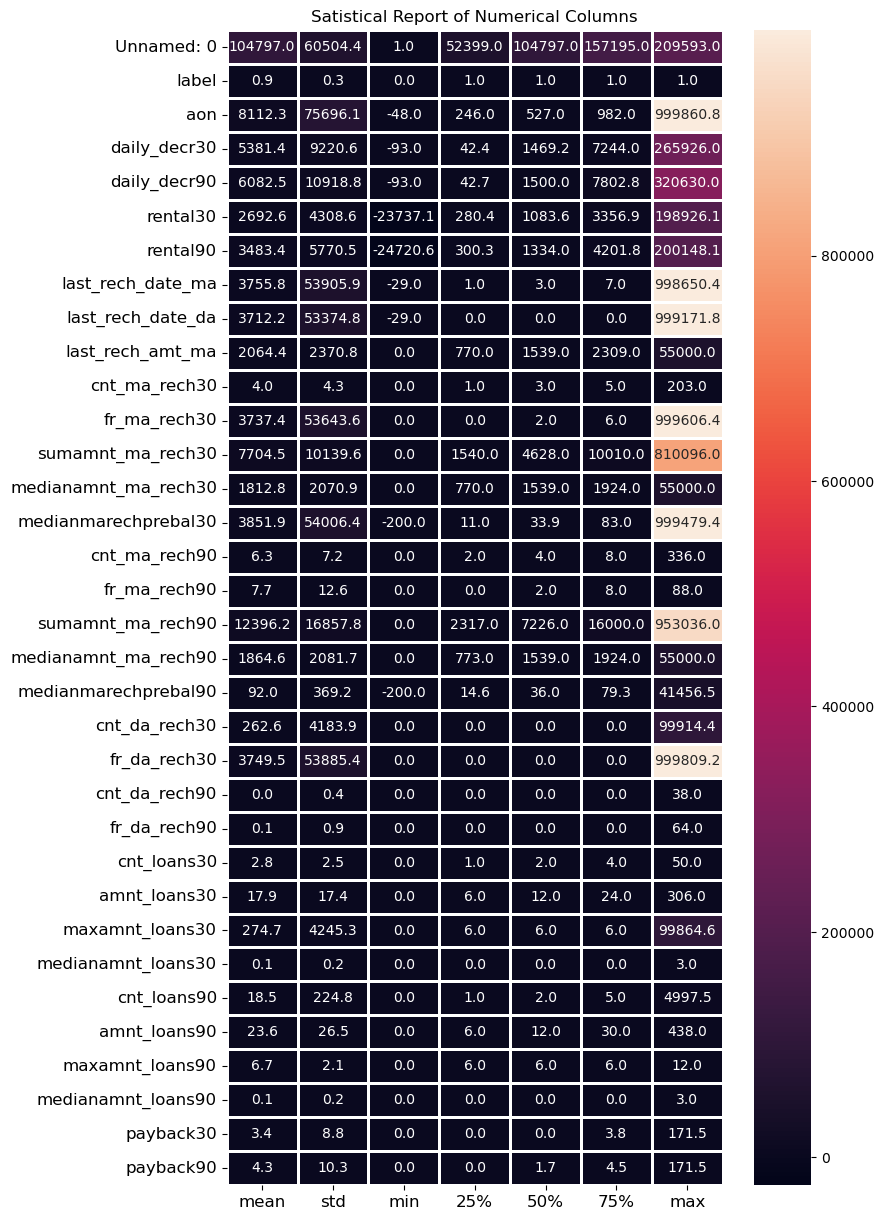

In [37]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (8,15))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".1f")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [38]:
# In the above report we can see that the maximum value for columns aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, fr_ma_rech30, sumamnt_ma_rech30, medianmarechprebal30, sumamnt_ma_rech90 and fr_da_rech30 have quite a high number than the other column values.
df.nunique().sort_values().to_frame("Unique Values")

,Unique Values
pcircle,1
label,2
maxamnt_loans90,3
medianamnt_loans90,6
medianamnt_loans30,6
cnt_da_rech90,27
cnt_loans30,40
fr_da_rech90,46
amnt_loans30,48
amnt_loans90,69


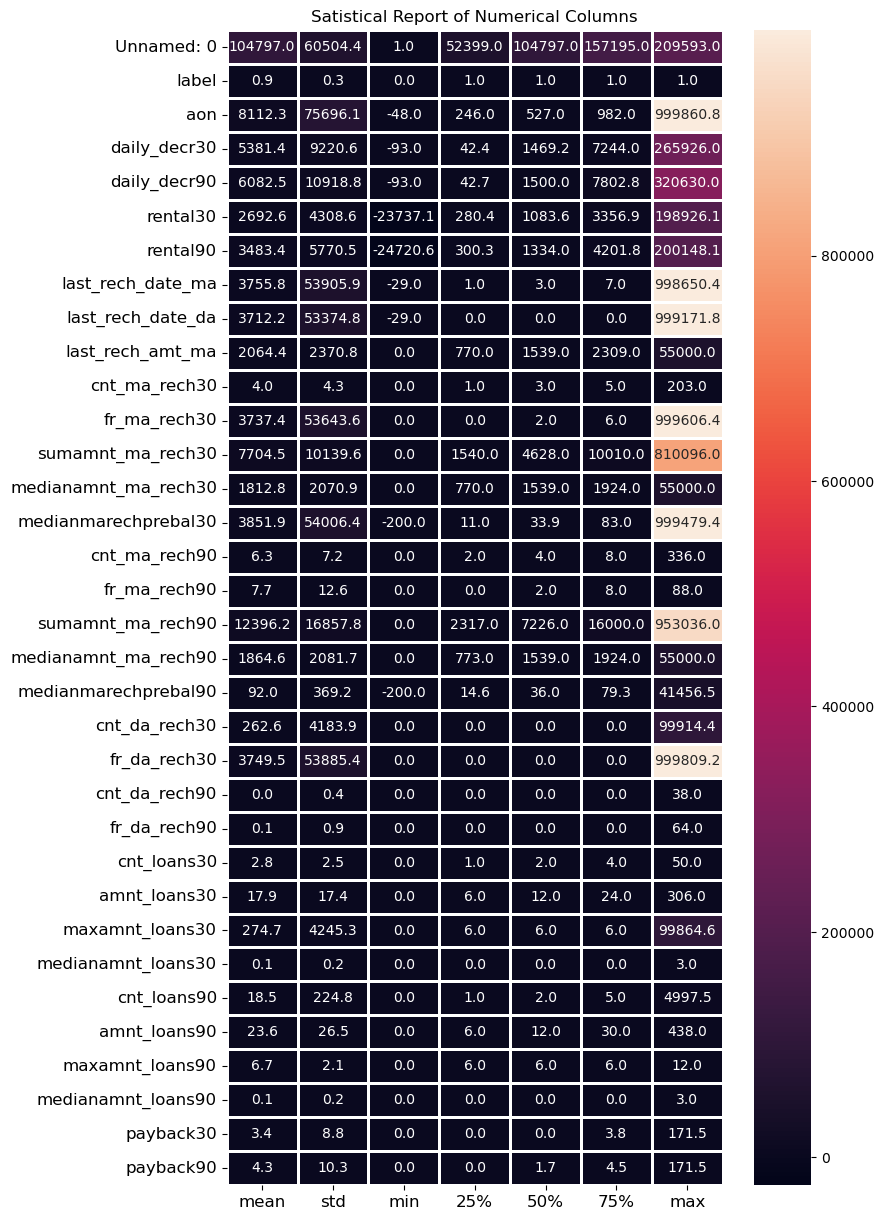

In [40]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (8,15))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".1f")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [39]:
'''In the above list we can see that column `pcircle` has 1 single data value filled in all the records and therefore does not contribute much towards the output label prediction.'''
df.drop("pcircle", axis=1, inplace=True)

# Visualization

In [ ]:
# pandas_profiling.ProfileReport(df)

### Univariate Analysis

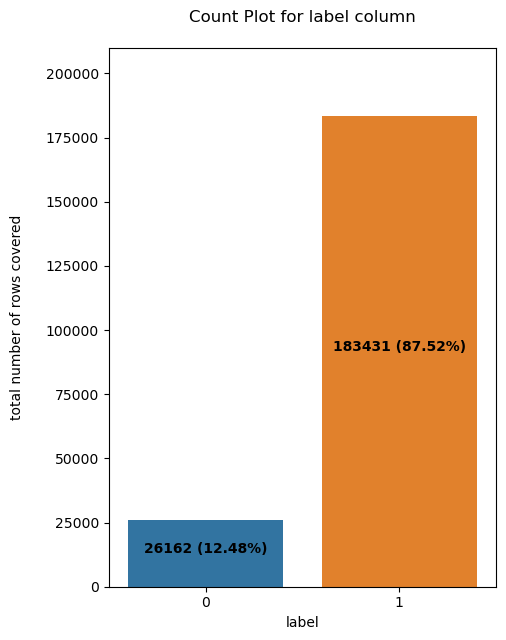

In [43]:
try:
    x = 'label'
    k=0
    plt.figure(figsize=[5,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

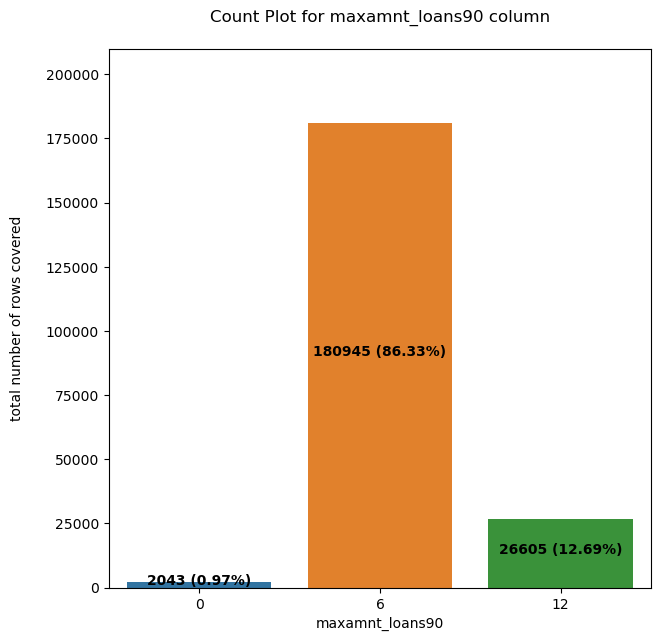

In [44]:
try:
    x = 'maxamnt_loans90'
    k=0
    plt.figure(figsize=[7,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

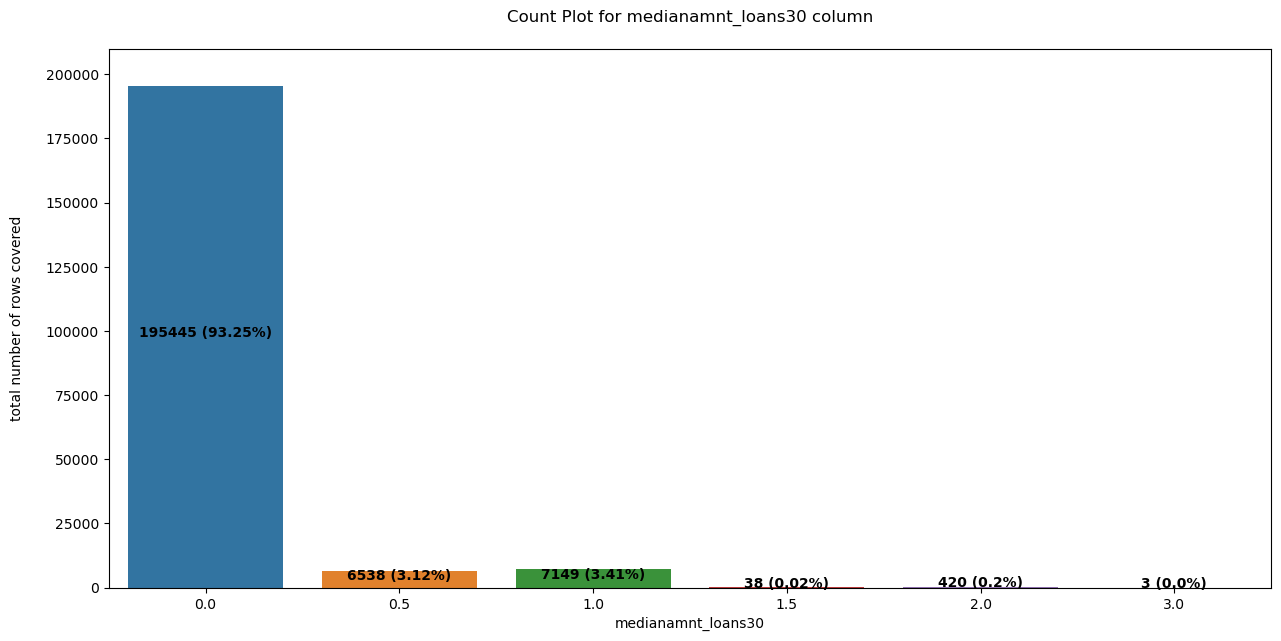

In [45]:
try:
    x = 'medianamnt_loans30'
    k=0
    plt.figure(figsize=[15,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

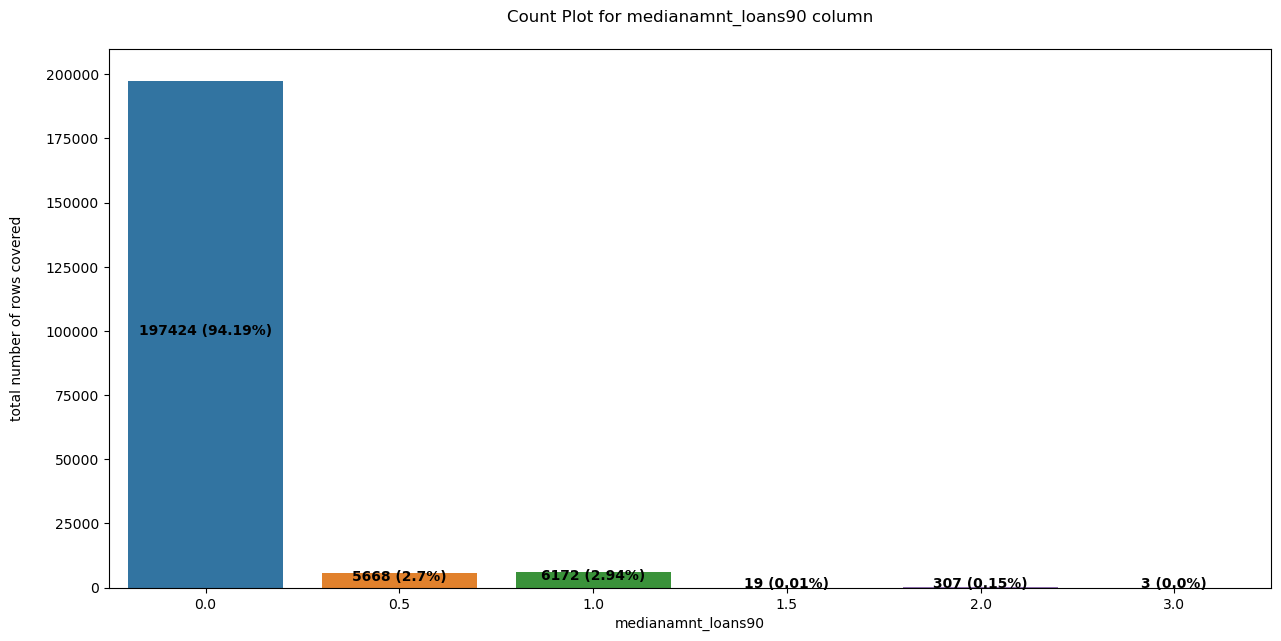

In [46]:
try:
    x = 'medianamnt_loans90'
    k=0
    plt.figure(figsize=[15,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

### Bivariate Analysis

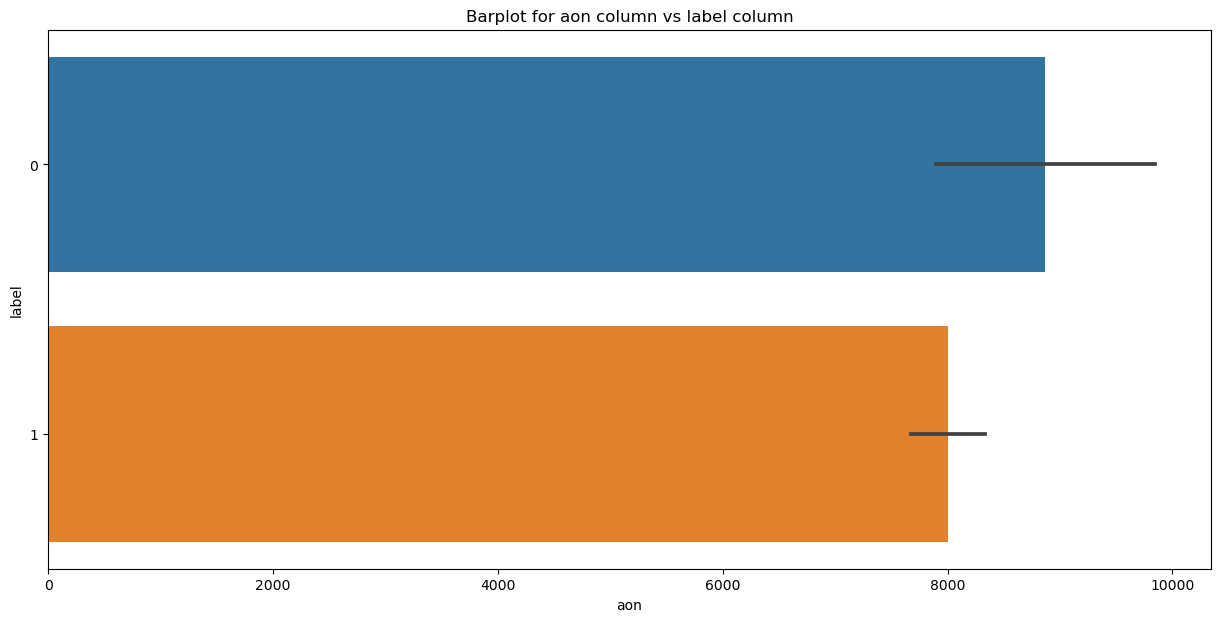

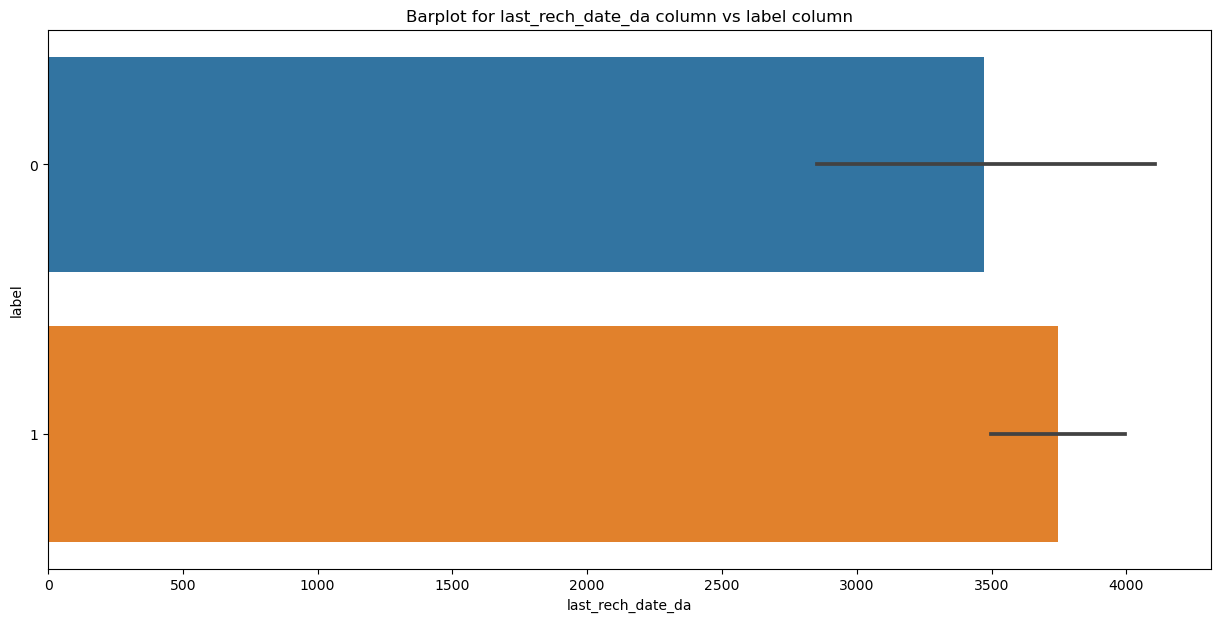

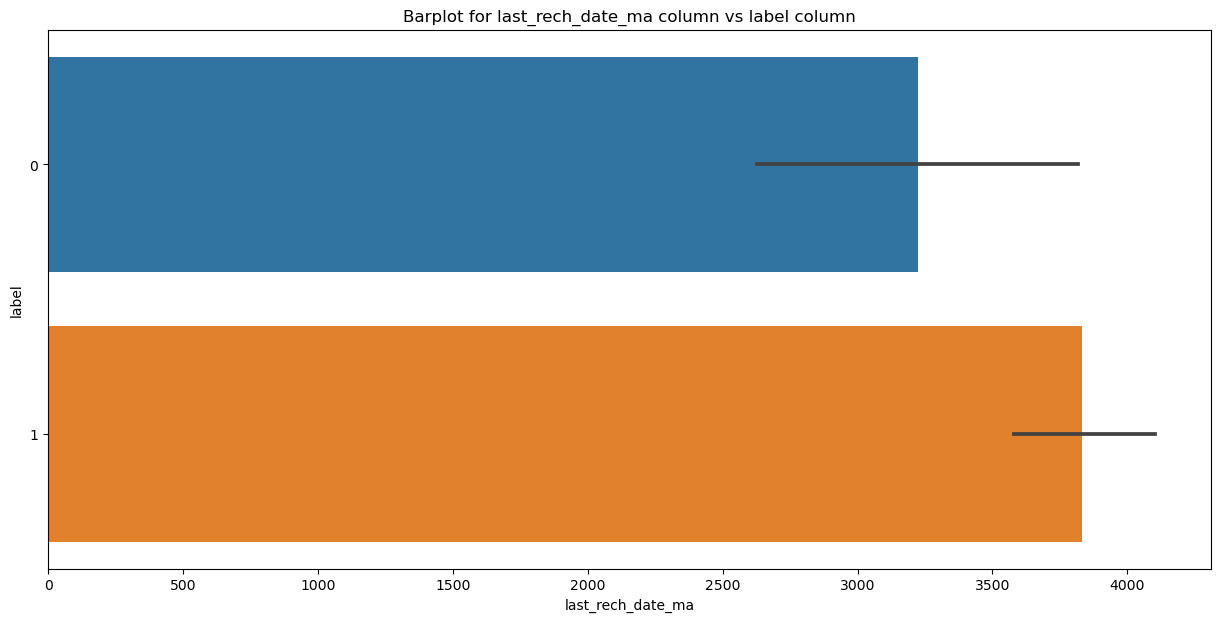

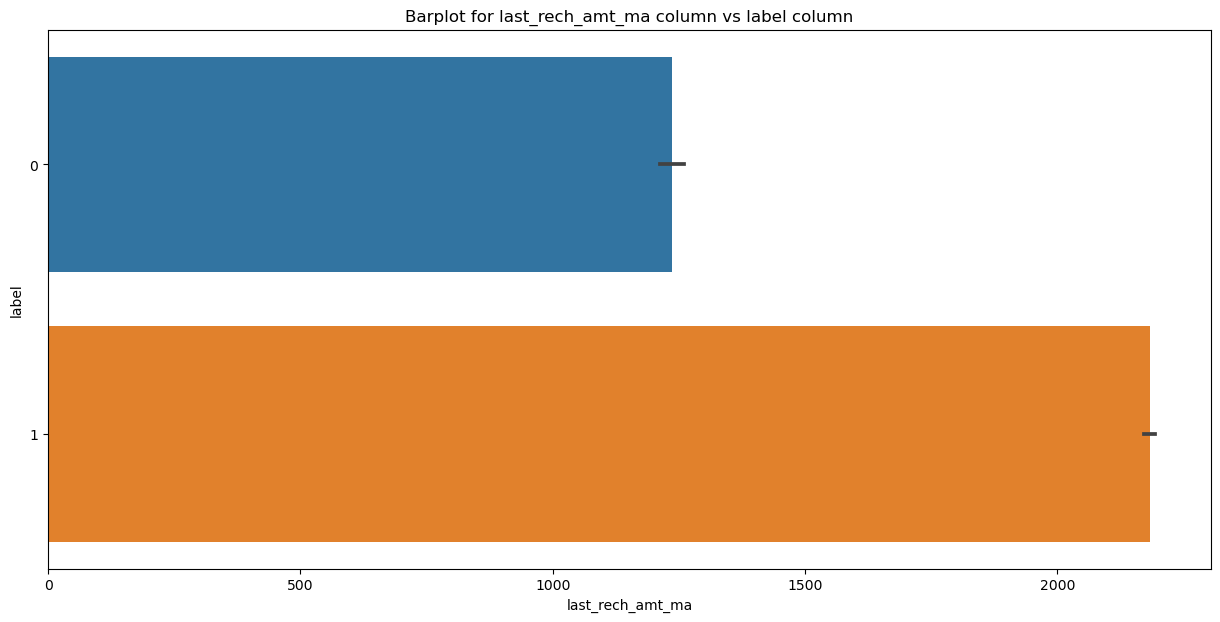

In [47]:
y = 'label'

x = 'aon'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_date_da'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_date_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_amt_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='sumamnt_ma_rech90'>

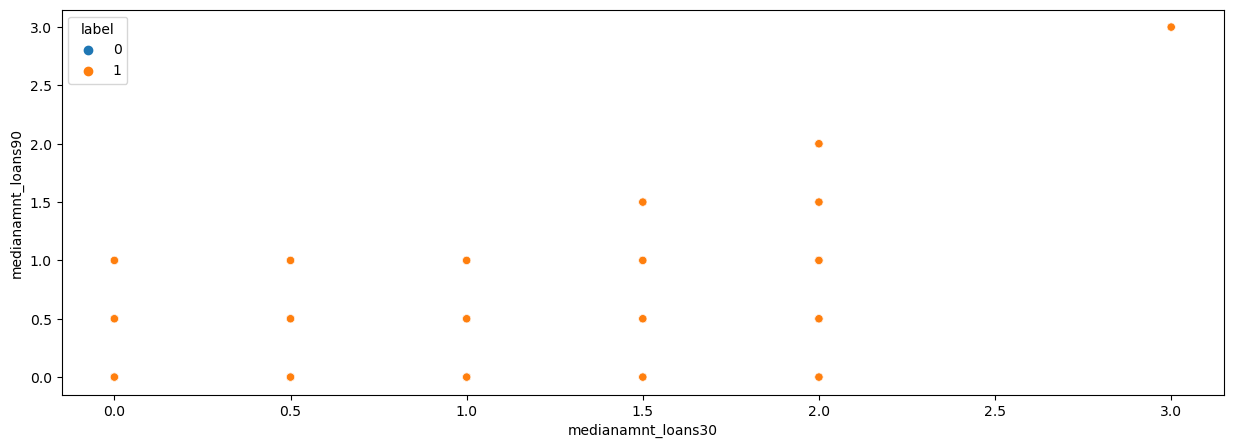

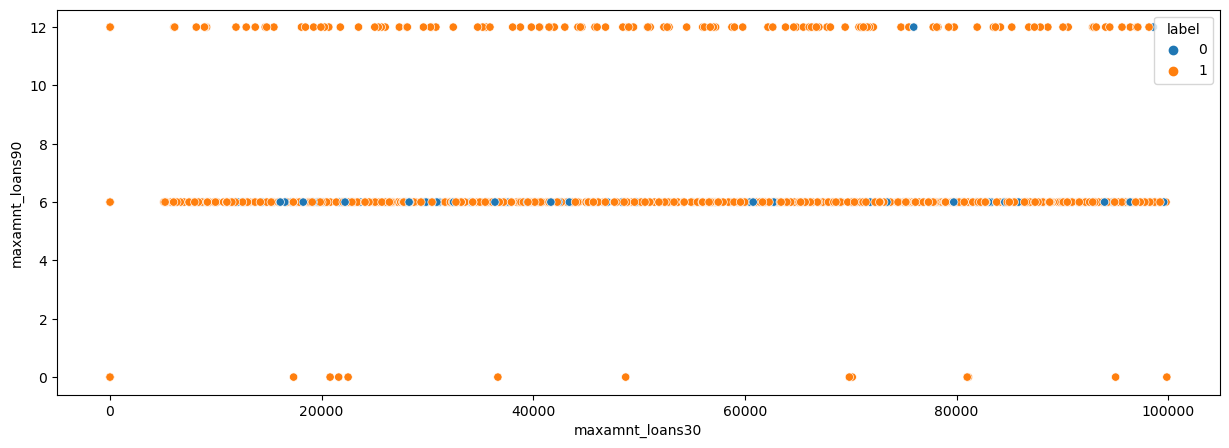

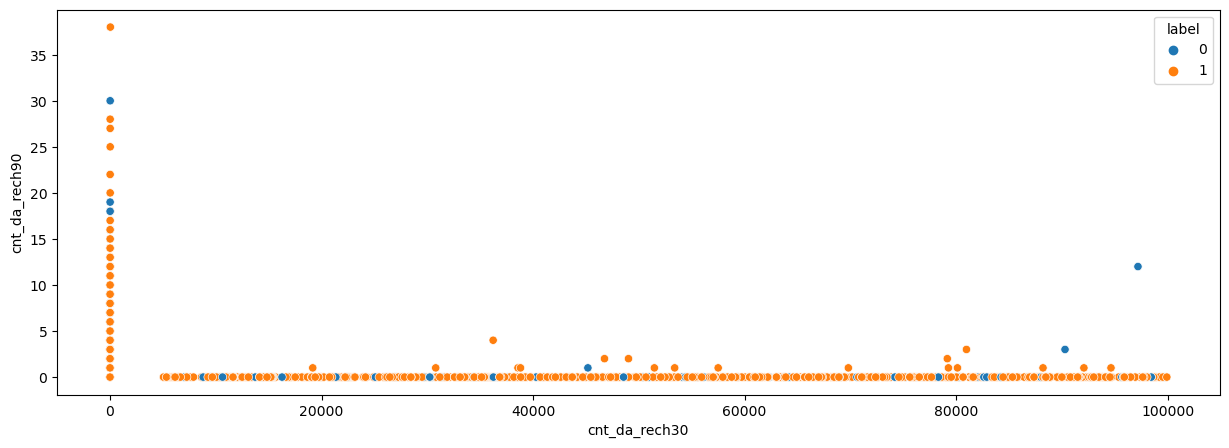

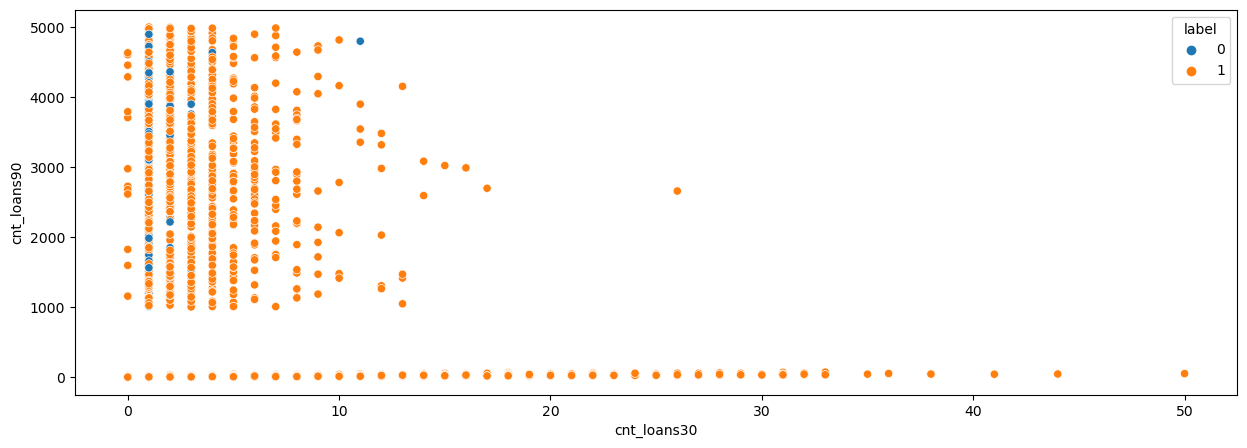

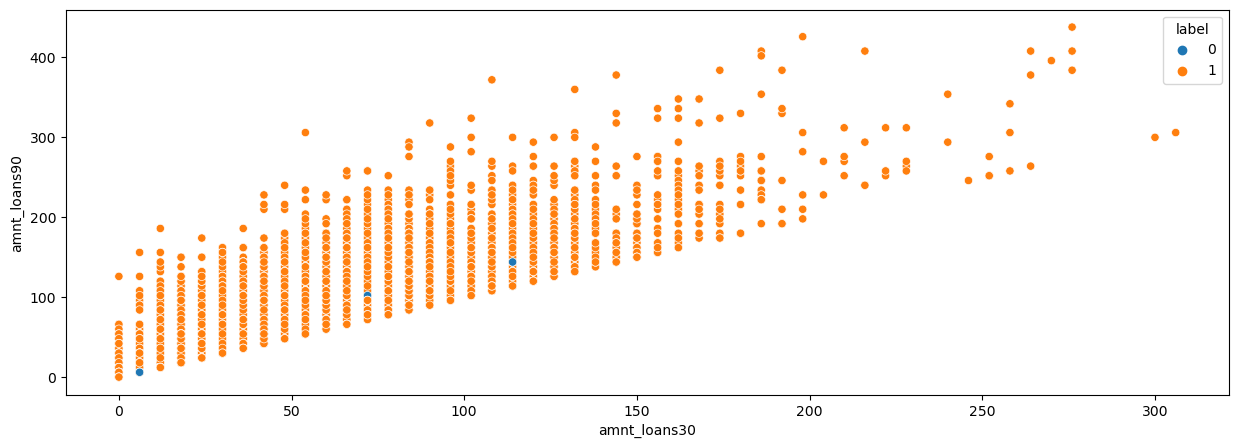

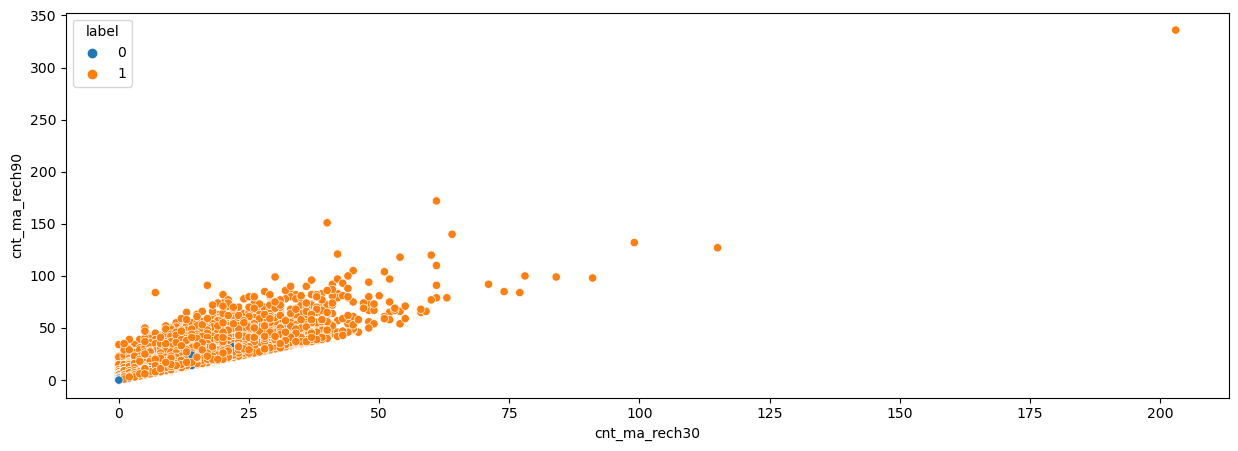

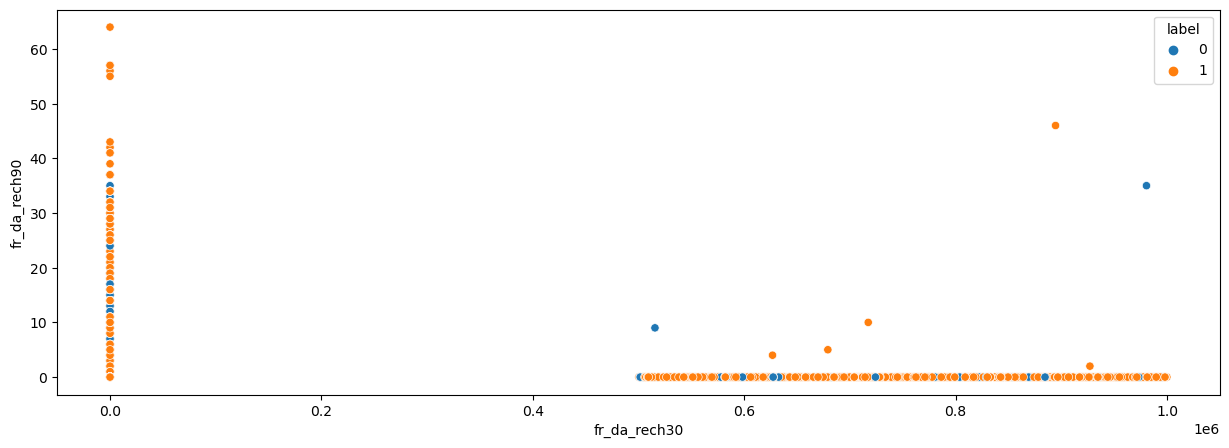

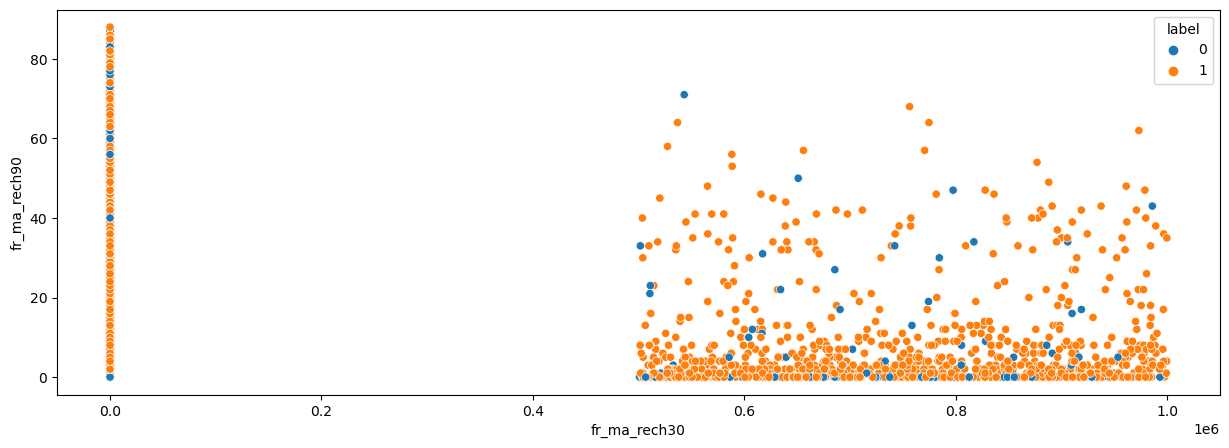

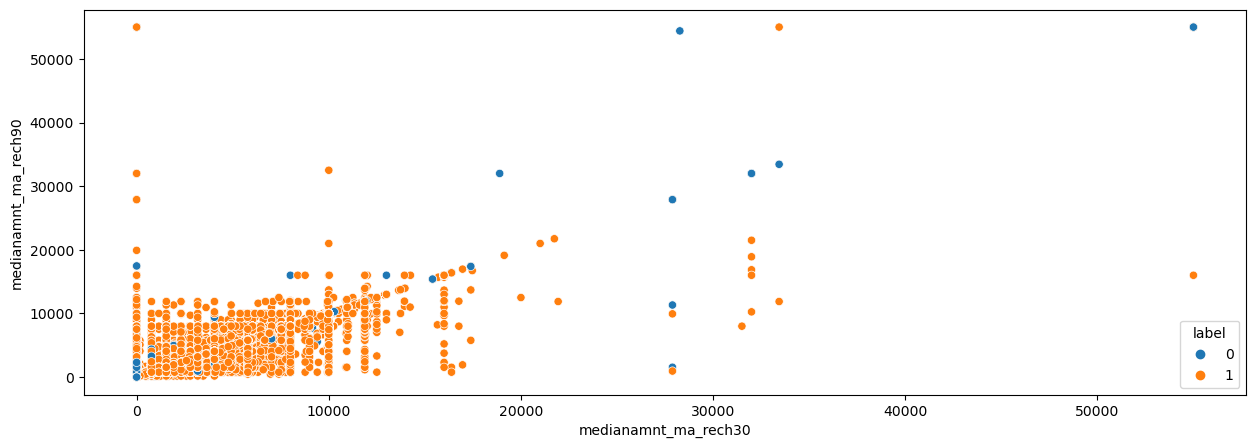

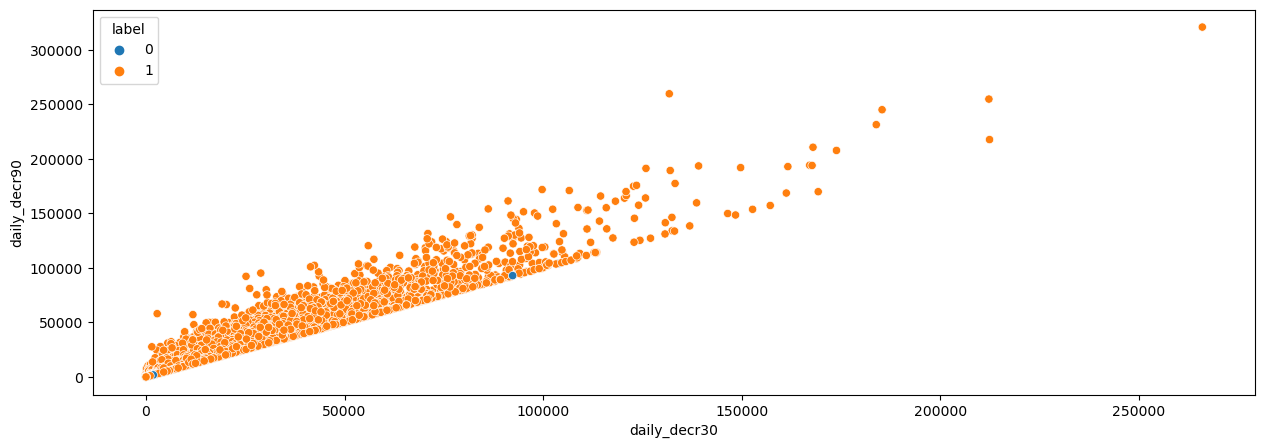

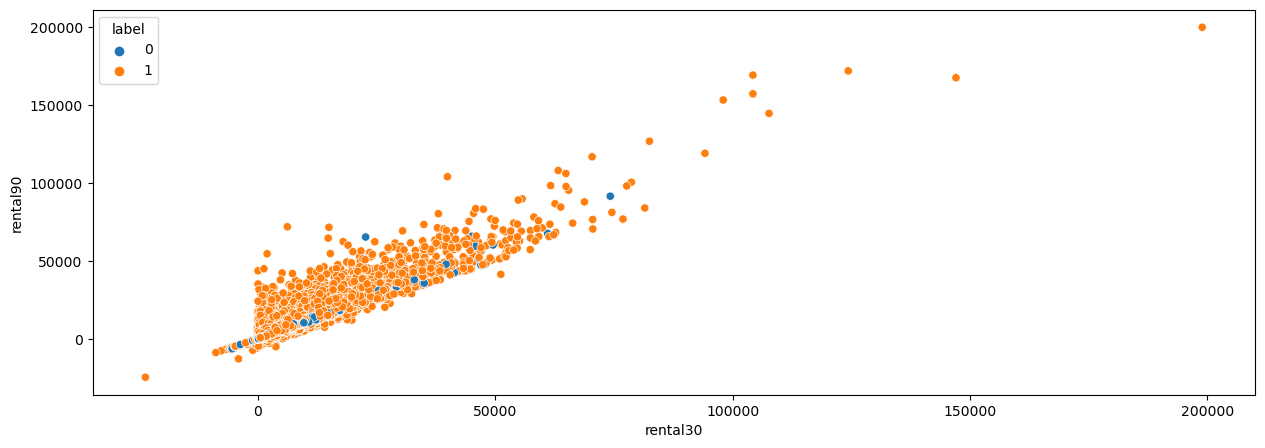

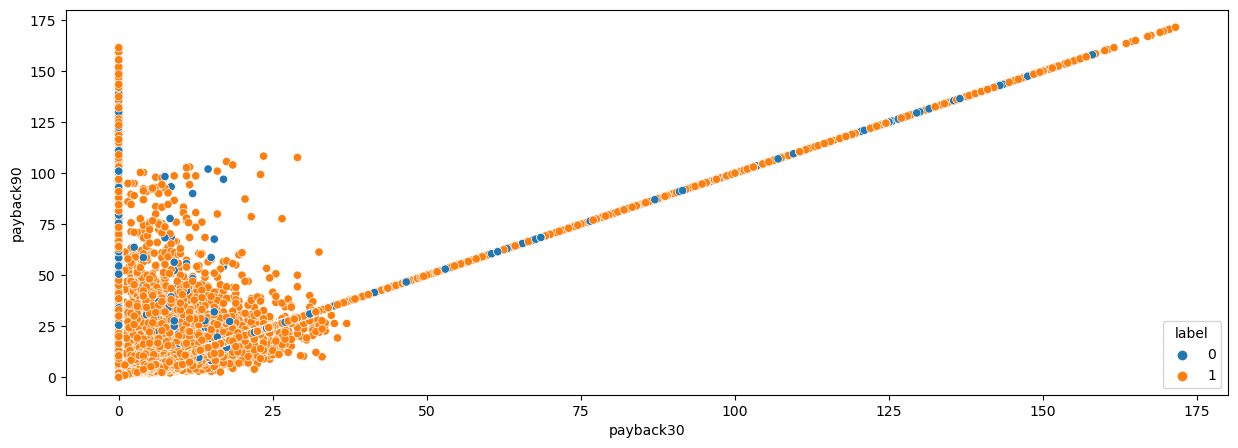

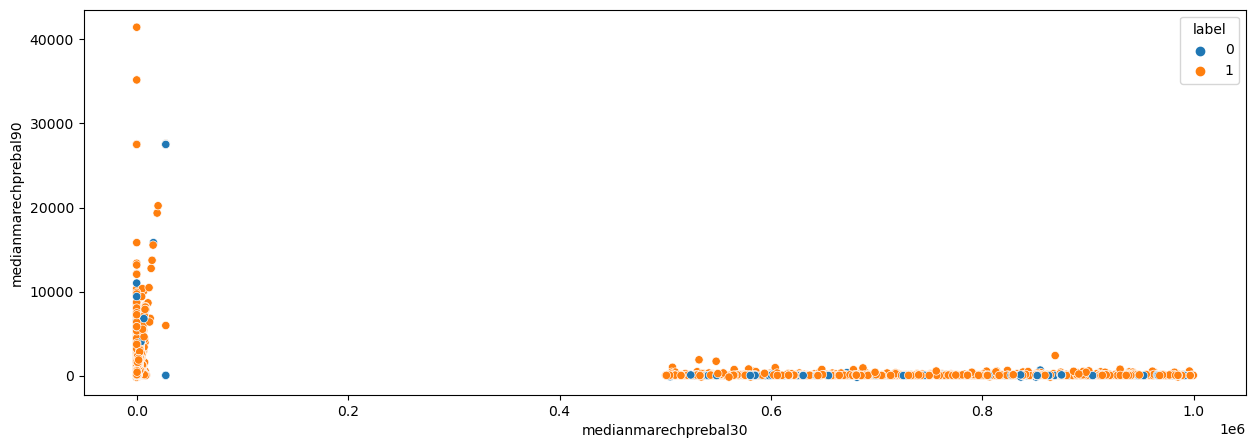

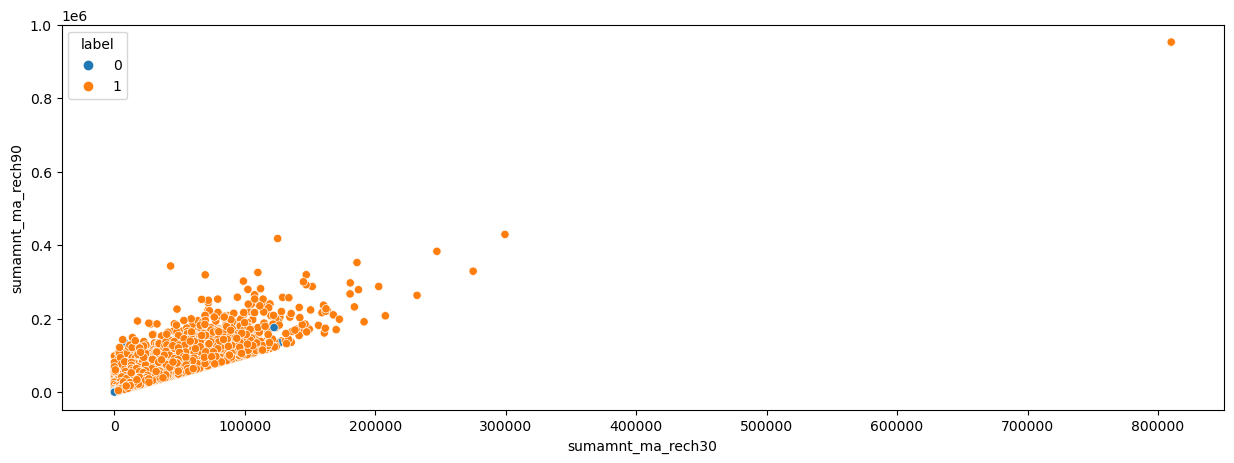

In [49]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='medianamnt_loans30', y='medianamnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='maxamnt_loans30', y='maxamnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='cnt_da_rech30', y='cnt_da_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='cnt_loans30', y='cnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='amnt_loans30', y='amnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='cnt_ma_rech30', y='cnt_ma_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='fr_da_rech30', y='fr_da_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='fr_ma_rech30', y='fr_ma_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='medianamnt_ma_rech30', y='medianamnt_ma_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='daily_decr30', y='daily_decr90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='rental30', y='rental90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='payback30', y='payback90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='medianmarechprebal30', y='medianmarechprebal90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='sumamnt_ma_rech30', y='sumamnt_ma_rech90', data=df, hue='label')

### Multivariate Analysis

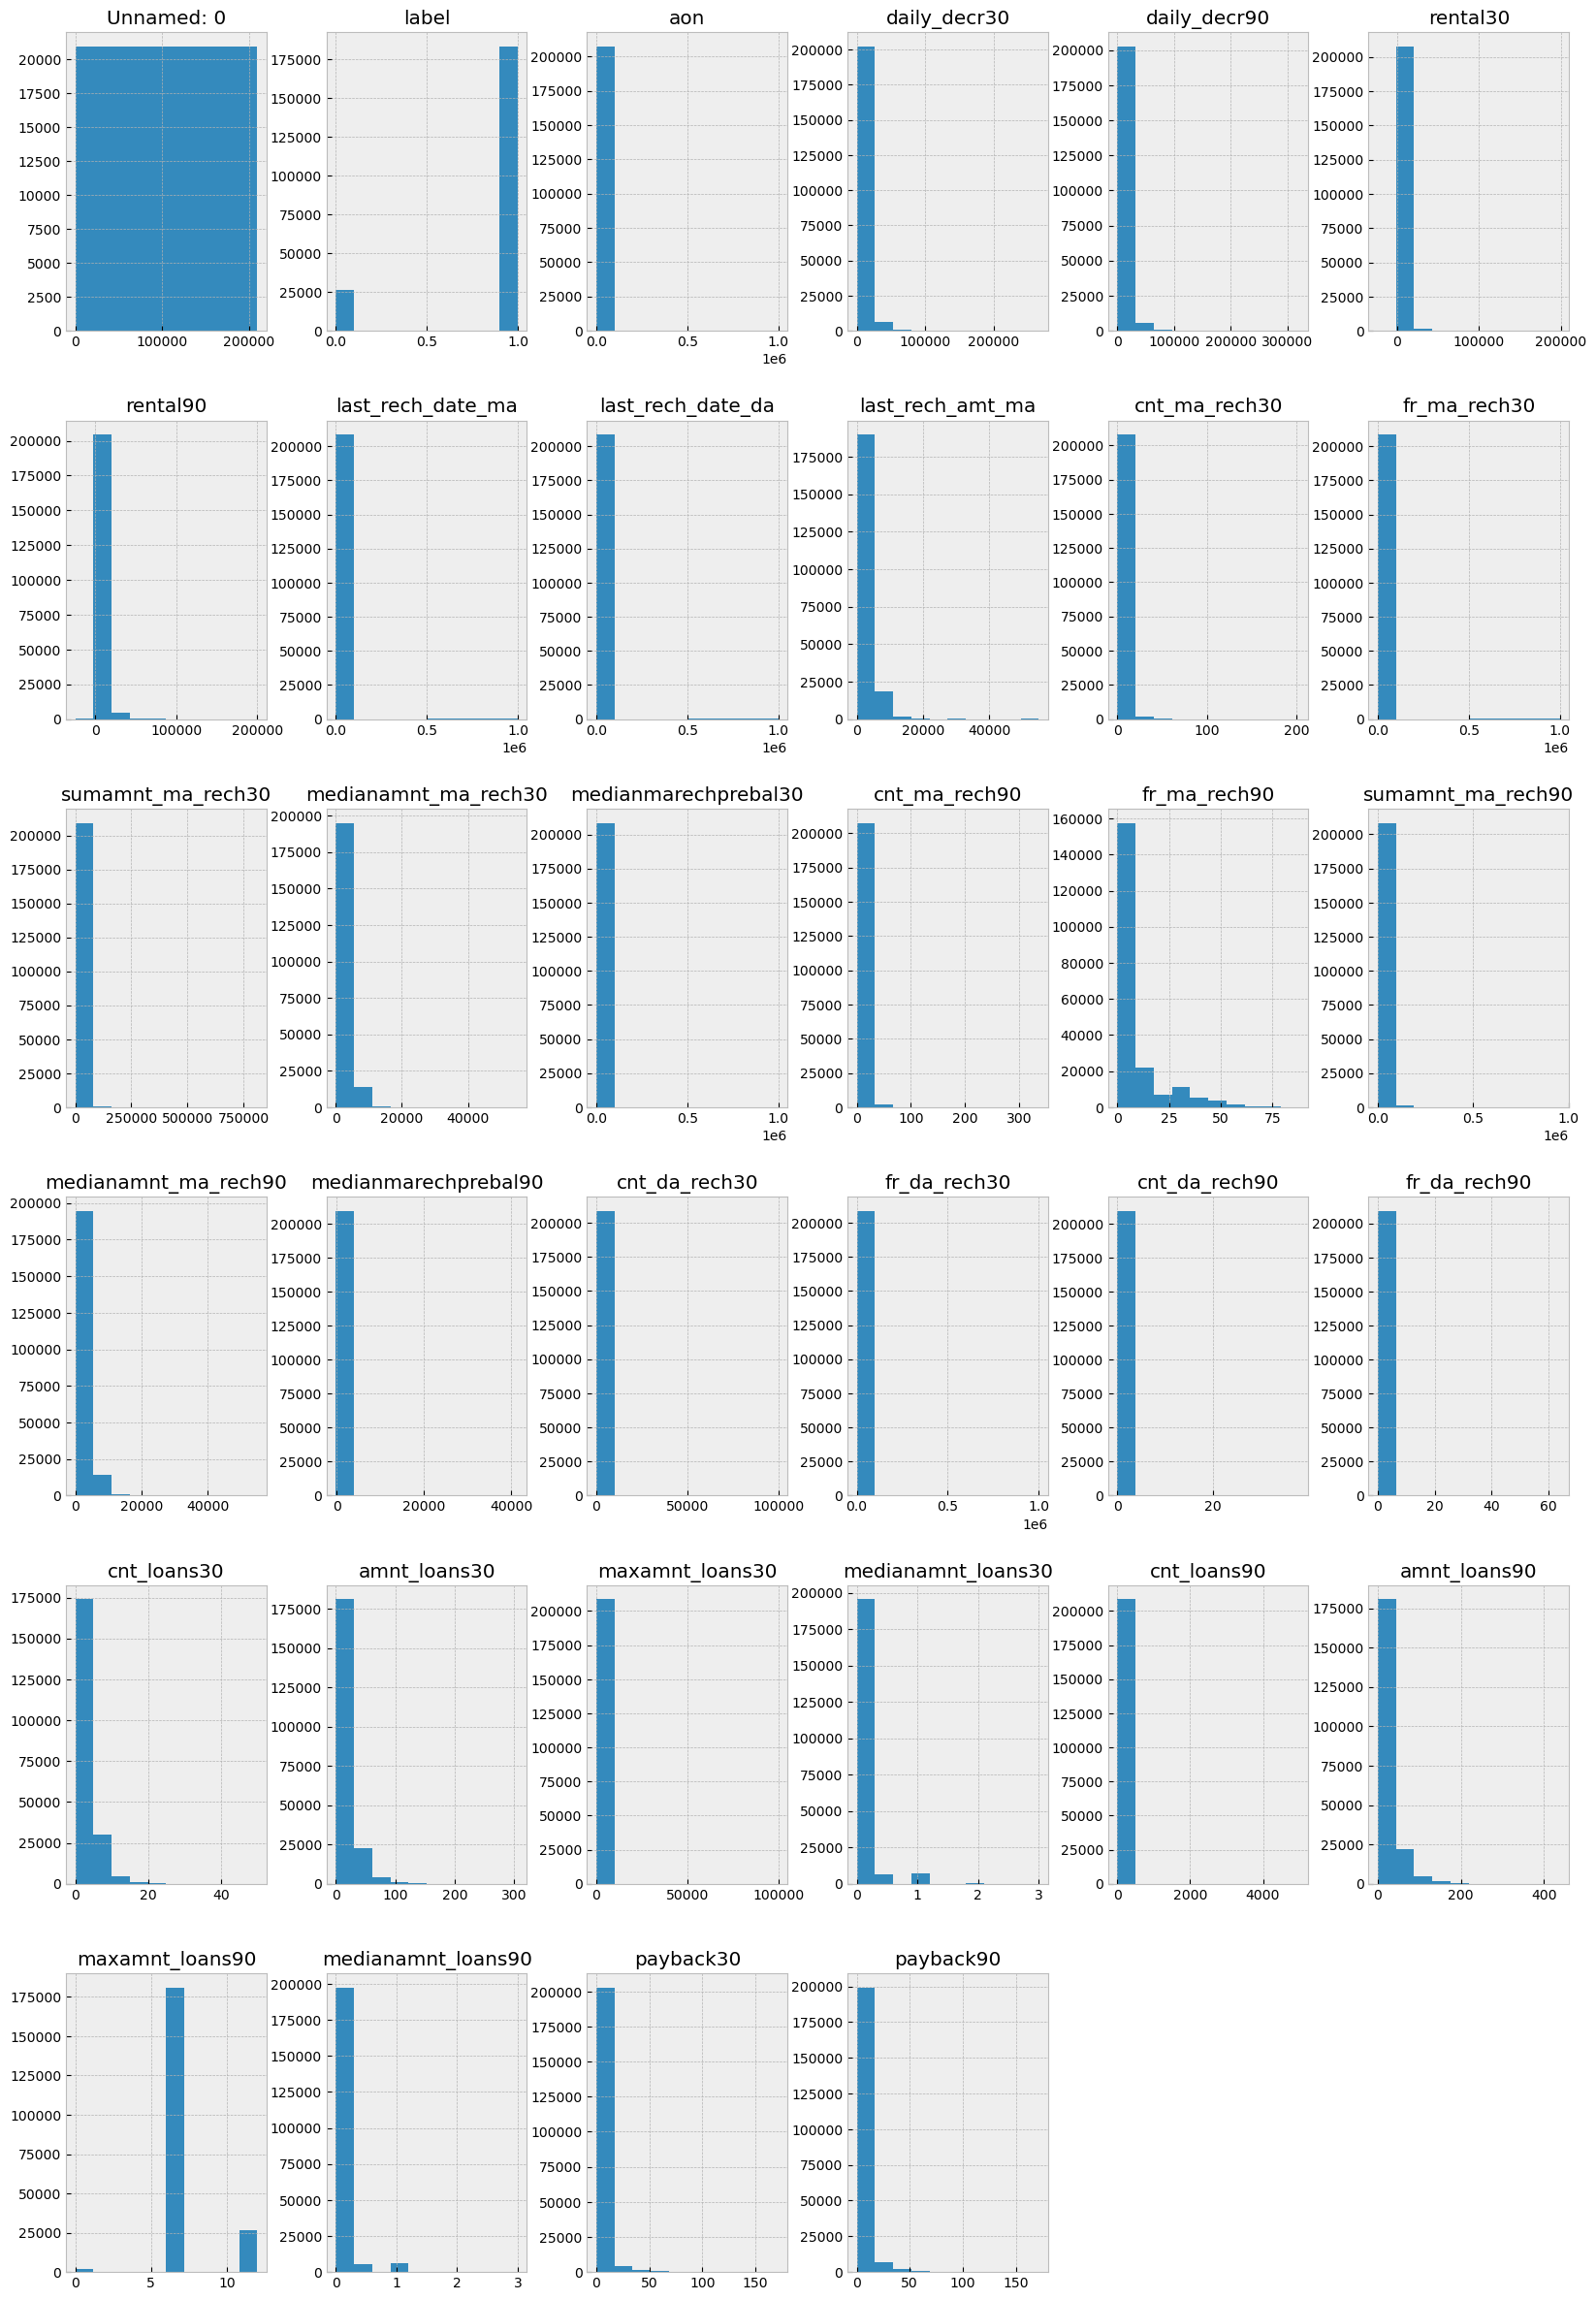

In [51]:
plt.style.use('bmh')

df.hist(figsize=(20,30))
plt.show()

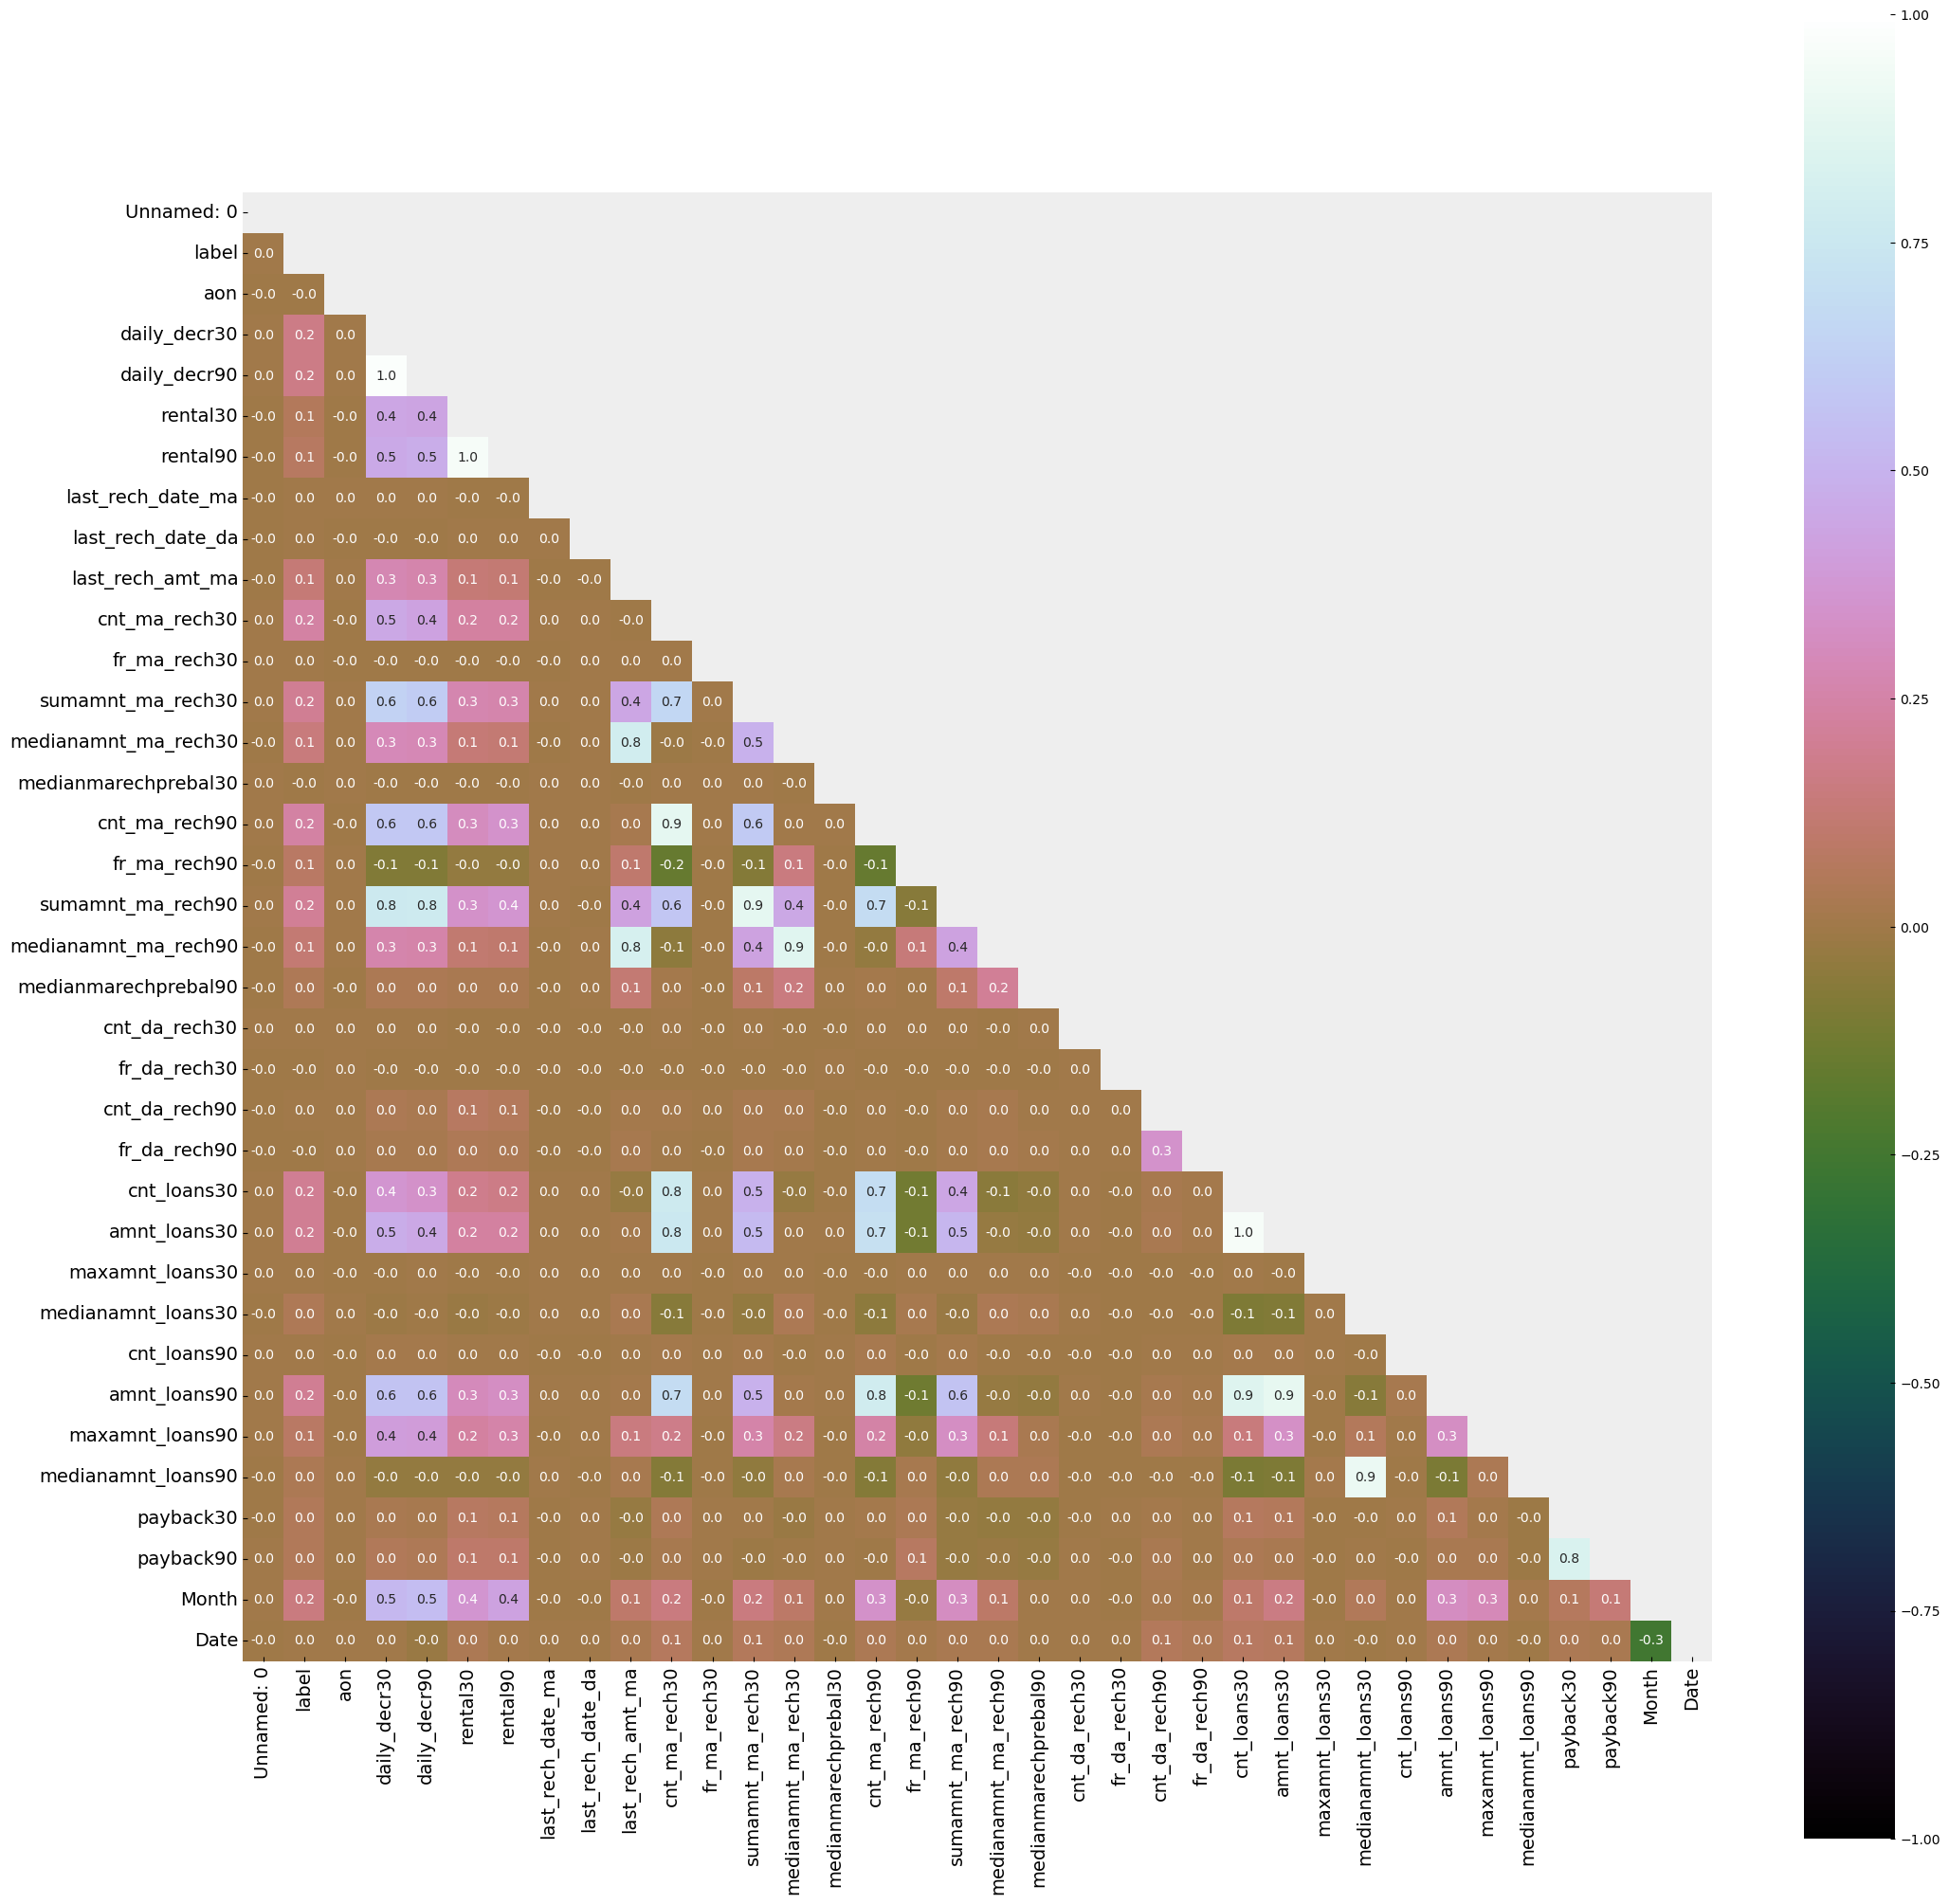

In [87]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.1f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### Correlation Bar Plot comparing Gender column with the remaining columns

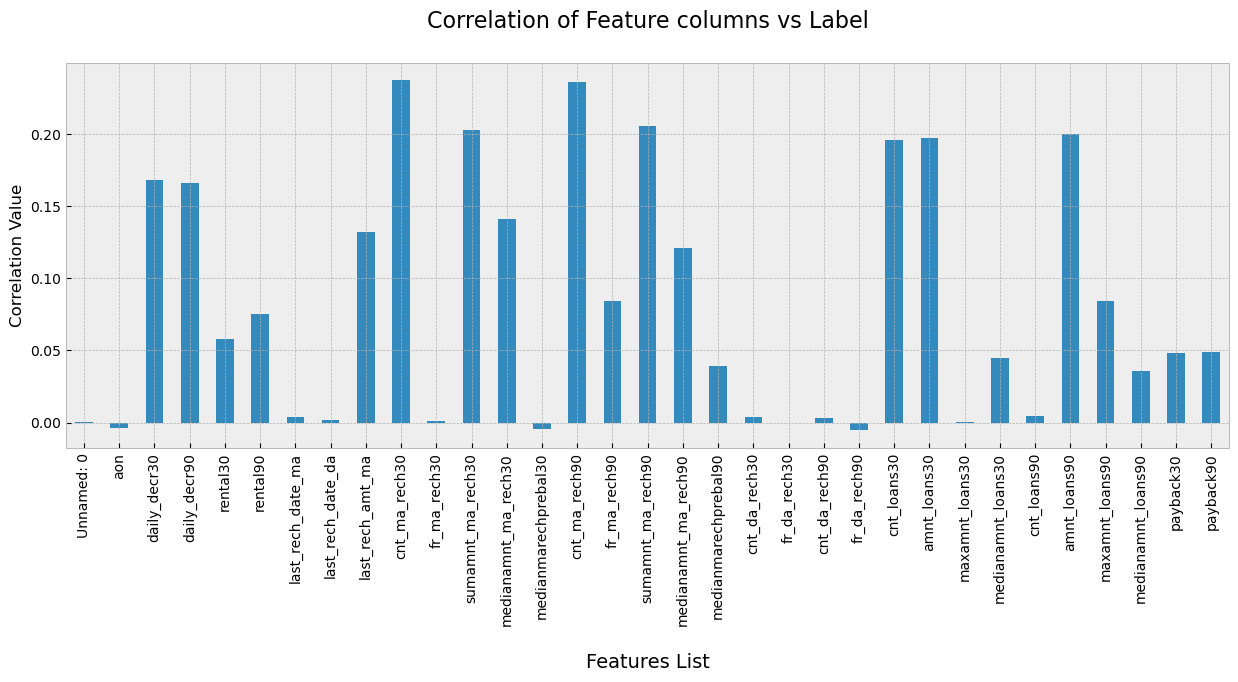

In [54]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['label'].drop('label').plot.bar()
plt.style.use('bmh')

plt.title("Correlation of Feature columns vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Data Preprocessing

In [55]:
df['pdate'] = pd.to_datetime(df['pdate']) # converting from object to datetime

df['Year']=df['pdate'].dt.year
df['Month']=df['pdate'].dt.month
df['Date']=df['pdate'].dt.day

print(df['Year'].value_counts())
print(df['Month'].value_counts())
print(df['Date'].value_counts())

2016    209593
Name: Year, dtype: int64
7    85765
6    83154
8    40674
Name: Month, dtype: int64
11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: Date, dtype: int64


In [56]:
df.drop(columns=['msisdn', 'pdate', 'Year'], axis=1, inplace=True)
df.head()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


I have dropped the columns that are not required or not contributing towards the label prediction.

### Outliers

Unnamed: 0                  AxesSubplot(0.125,0.77;0.110714x0.11)
label                    AxesSubplot(0.257857,0.77;0.110714x0.11)
aon                      AxesSubplot(0.390714,0.77;0.110714x0.11)
daily_decr30             AxesSubplot(0.523571,0.77;0.110714x0.11)
daily_decr90             AxesSubplot(0.656429,0.77;0.110714x0.11)
rental30                 AxesSubplot(0.789286,0.77;0.110714x0.11)
rental90                   AxesSubplot(0.125,0.638;0.110714x0.11)
last_rech_date_ma       AxesSubplot(0.257857,0.638;0.110714x0.11)
last_rech_date_da       AxesSubplot(0.390714,0.638;0.110714x0.11)
last_rech_amt_ma        AxesSubplot(0.523571,0.638;0.110714x0.11)
cnt_ma_rech30           AxesSubplot(0.656429,0.638;0.110714x0.11)
fr_ma_rech30            AxesSubplot(0.789286,0.638;0.110714x0.11)
sumamnt_ma_rech30          AxesSubplot(0.125,0.506;0.110714x0.11)
medianamnt_ma_rech30    AxesSubplot(0.257857,0.506;0.110714x0.11)
medianmarechprebal30    AxesSubplot(0.390714,0.506;0.110714x0.11)
cnt_ma_rec

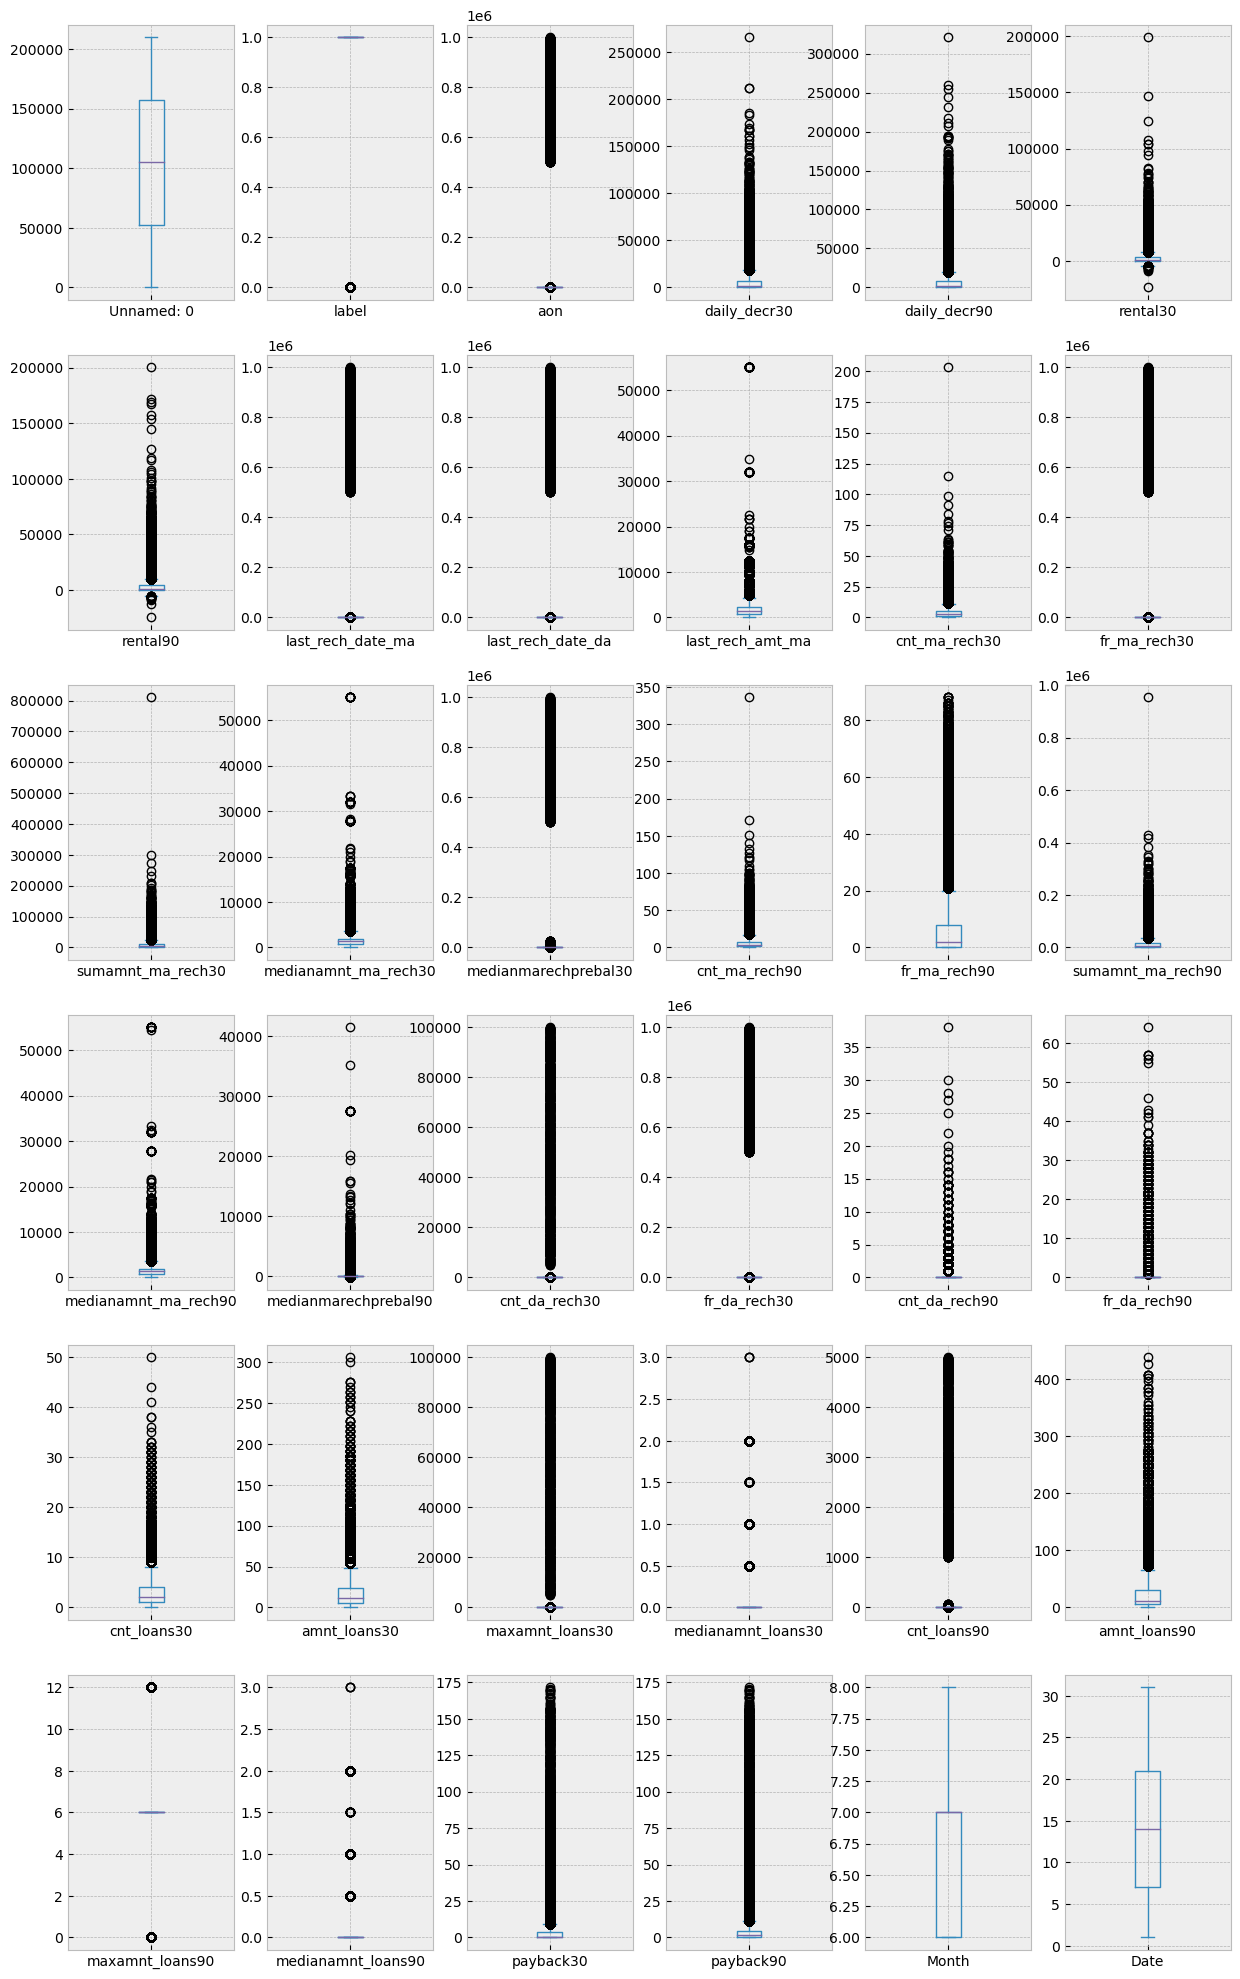

In [59]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(15,25))

### Skewness

In [64]:
df.skew().sort_values()

label                   -2.270254
Unnamed: 0               0.000000
Date                     0.199845
Month                    0.343242
maxamnt_loans90          1.678304
fr_ma_rech90             2.285423
cnt_loans30              2.713421
amnt_loans30             2.975719
amnt_loans90             3.150006
cnt_ma_rech30            3.283842
cnt_ma_rech90            3.425254
medianamnt_ma_rech30     3.512324
medianamnt_ma_rech90     3.752706
last_rech_amt_ma         3.781149
daily_decr30             3.946230
daily_decr90             4.252565
rental90                 4.437681
rental30                 4.521929
medianamnt_loans30       4.551043
medianamnt_loans90       4.895720
sumamnt_ma_rech90        4.897950
sumamnt_ma_rech30        6.386787
payback90                6.899951
payback30                8.310695
aon                     10.392949
fr_ma_rech30            14.772833
fr_da_rech30            14.776430
medianmarechprebal30    14.779875
last_rech_date_ma       14.790974
last_rech_date

## Splitting the dataset

In [67]:
X = df.drop('label', axis=1)
Y = df['label']

## Resolving the class imbalance issue in our label column

In [68]:
old_label = Y.value_counts()
old_label

1    183431
0     26162
Name: label, dtype: int64

In [69]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [70]:
new_label = Y.value_counts()
new_label

0    183431
1    183431
Name: label, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

# Feature Scaling

In [71]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Unnamed: 0,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
0,-1.732697,-0.104752,-0.071498,-0.105619,-0.535981,-0.520500,-0.067720,-0.069095,-0.067027,-0.208211,-0.068962,-0.264356,0.036925,-0.074563,-0.374952,1.252811,-0.378082,-0.008395,-0.175700,-0.060025,-0.069666,-0.086506,-0.054301,-0.058818,-0.137526,-0.062669,-0.233511,-0.066897,-0.254725,-0.283647,-0.221464,3.052705,2.540535,0.563196,0.767763
1,-1.732680,-0.099032,1.135295,0.923081,0.322918,0.141318,-0.067373,-0.069095,1.855872,-0.478430,-0.069359,0.051080,2.232421,-0.073625,-0.537799,-0.549583,-0.185606,2.145440,-0.031238,-0.060025,-0.069666,-0.086506,-0.054301,-0.525668,-0.137526,-0.061247,-0.233511,-0.071994,-0.254725,3.209817,-0.221464,-0.339857,-0.373787,2.041523,-0.539560
2,-1.732664,-0.101333,-0.292048,-0.294921,-0.367721,-0.397053,-0.067701,-0.069095,-0.067027,-0.478430,-0.069359,-0.443556,0.036925,-0.073533,-0.537799,-0.549583,-0.487428,-0.008395,-0.016992,-0.060025,-0.069666,-0.086506,-0.054301,-0.525668,-0.550493,-0.062669,-0.233511,-0.071994,-0.529366,-0.283647,-0.221464,-0.339857,-0.373787,2.041523,0.637031
3,-1.732647,-0.105155,-0.475293,-0.451251,-0.551003,-0.539926,-0.066969,-0.069095,-0.335002,-0.748650,-0.069359,-0.622757,-0.758477,-0.074695,-0.537799,-0.549583,-0.529490,-0.308552,-0.189191,-0.060025,-0.069666,-0.086506,-0.054301,-0.058818,-0.137526,-0.062669,-0.233511,-0.066897,-0.254725,-0.283647,-0.221464,-0.339857,-0.373787,-0.915130,-1.062490
4,-1.732631,-0.095977,-0.458071,-0.436559,-0.318537,-0.358713,-0.067681,-0.069095,0.281521,1.142885,-0.069321,1.709414,0.434885,-0.074187,0.602132,-0.377927,1.072627,0.675580,-0.101499,-0.060025,-0.069666,-0.086506,-0.054301,2.275429,1.927314,-0.062669,-0.233511,-0.041407,1.118478,-0.283647,-0.221464,-0.066892,-0.139301,-0.915130,1.029228


# Finding best random state for building Classification Models

In [73]:
maxAccu=0
maxRS=0

for i in range(1, 50):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 80.01875354354748 on Random State 28


## Feature importance bar graph

,Importance
Features,
amnt_loans90,0.077
sumamnt_ma_rech90,0.069
cnt_loans90,0.068
cnt_ma_rech90,0.063
amnt_loans30,0.062
Month,0.058
daily_decr90,0.056
daily_decr30,0.049
Date,0.046


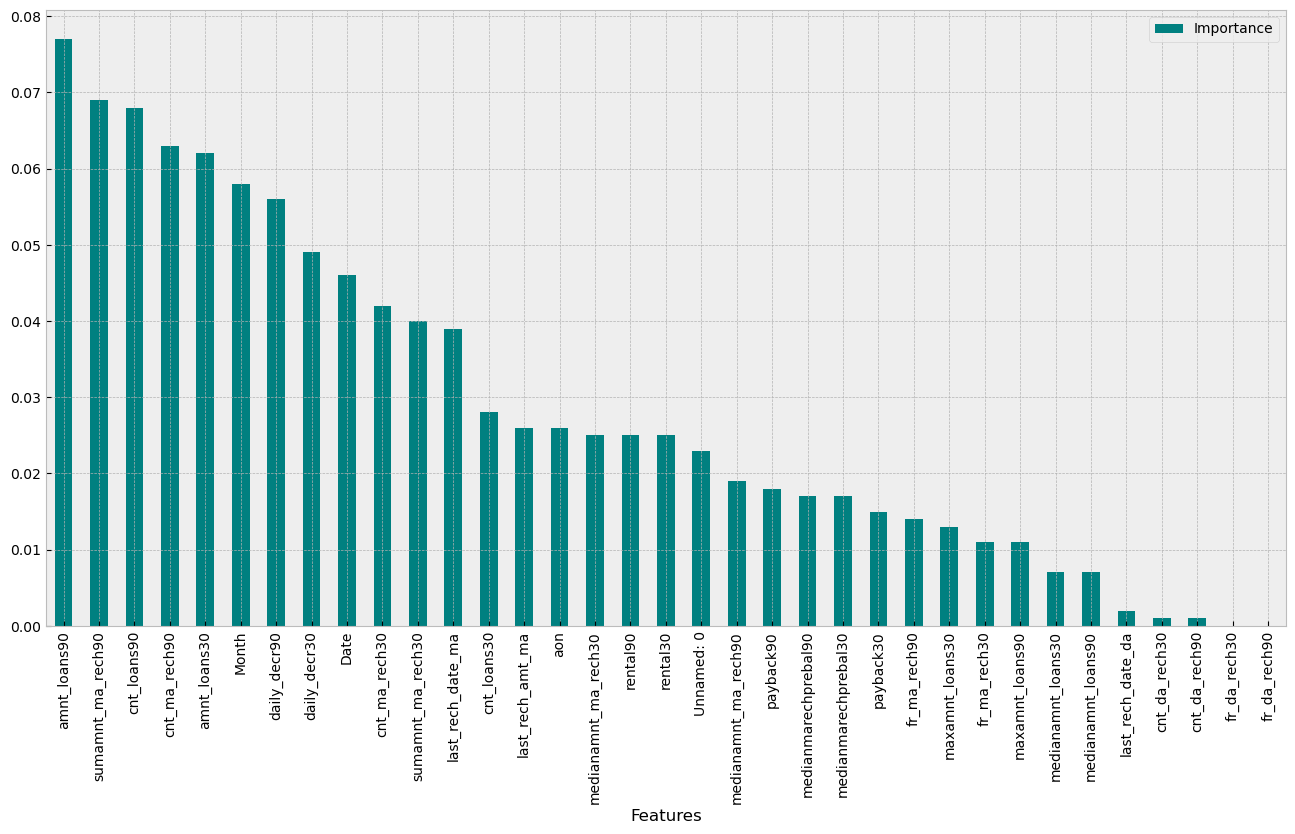

In [75]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
plt.rcParams["figure.figsize"] = (16,8)
importances.plot.bar(color='teal')
importances

In [76]:
X.drop(["last_rech_date_da", "cnt_da_rech90", "cnt_da_rech30", "fr_da_rech30", "fr_da_rech90"], axis=1, inplace=True)

# Creating the training and testing data sets with optimum Random State

In [77]:
x = X
y = Y

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=33)

I have separated the entire dataset into training and testing chunks in the ratio 75:25 so that our classification model can learn on the training dataset and then we can check the accuracy using the unseen testing dataset.

# Machine Learning Model for Classification with Evaluation Metrics

In [79]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [80]:
# creating a function to run all the classifiers

def classifier(model, x, y):
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

### Logistic Regression

In [81]:
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 79.81818925217723

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81     36860
           1       0.83      0.74      0.79     36513

    accuracy                           0.80     73373
   macro avg       0.80      0.80      0.80     73373
weighted avg       0.80      0.80      0.80     73373

Cross Validation Score: 76.62718802350167

Accuracy Score - Cross Validation Score is 3.1910012286755602


### Naive Bayes

In [82]:
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 71.77708421353904

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.89      0.76     36860
           1       0.83      0.54      0.66     36513

    accuracy                           0.72     73373
   macro avg       0.75      0.72      0.71     73373
weighted avg       0.75      0.72      0.71     73373

Cross Validation Score: 71.45493652392086

Accuracy Score - Cross Validation Score is 0.32214768961817697


### Decision Tree Classifier

In [83]:
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 90.87402723072519

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     36860
           1       0.91      0.90      0.91     36513

    accuracy                           0.91     73373
   macro avg       0.91      0.91      0.91     73373
weighted avg       0.91      0.91      0.91     73373

Cross Validation Score: 66.43892732550245

Accuracy Score - Cross Validation Score is 24.435099905222742


### SGD Classifier

In [85]:
model = SGDClassifier()
classifier(model, x, y)

Accuracy Score: 79.5292546304499

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80     36860
           1       0.82      0.75      0.79     36513

    accuracy                           0.80     73373
   macro avg       0.80      0.80      0.79     73373
weighted avg       0.80      0.80      0.79     73373

Cross Validation Score: 77.76576369954816

Accuracy Score - Cross Validation Score is 1.7634909309017388


### ExtraTrees Classifier

In [88]:
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 94.75147533833972

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     36860
           1       0.95      0.95      0.95     36513

    accuracy                           0.95     73373
   macro avg       0.95      0.95      0.95     73373
weighted avg       0.95      0.95      0.95     73373

Cross Validation Score: 82.3298921465742

Accuracy Score - Cross Validation Score is 12.42158319176552


# Hyper parameter tuning

In [89]:
x_test.shape

(73373, 30)

In [90]:
y_test.shape

(73373,)

In [91]:
x_train.shape

(293489, 30)

In [92]:
y_train.shape

(293489,)

In [93]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'random_state' : [33, 72],
              'n_estimators': [200, 300]}

In [ ]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=3, n_jobs = -1, verbose=3)
GCV.fit(x_train,y_train)
GCV.best_params_      # printing best parameters found by GridSearchCV

Fitting 3 folds for each of 24 candidates, totalling 72 fits


We got the best parameters using Gridsearch CV

In [ ]:
final_model = ExtraTreesClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 200, random_state = 72)   # final model with best parameters

In [ ]:
final_fit = final_model.fit(x_train,y_train)   # final fit
final_pred = final_model.predict(x_test)   # predicting with best parameters

In [ ]:
best_acc_score = (accuracy_score(y_test, final_pred))*100    # checking accuracy score
print("The Accuracy Score for the Best Model is ", best_acc_score)

In [ ]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_model, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

In [ ]:
# Final Classification Report
final_class_report = classification_report(y_test, final_pred)
print("\nClassification Report:\n", final_class_report)

We successfully performed the Hyper Parameter Tuning on the Final Model.
We got final accuracy score of 95.145% and Cross Validation Score of 94.907% which is good

# Confusion Matrix

In [ ]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(final_model, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Final Model \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction (depicting in the black boxes).

# AUC ROC curve

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_model, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

We got final accuracy score of 95.145% and Cross Validation Score of 94.9% and also AUC score is 0.99 which is really good.

# Saving the model in pickle Format

In [ ]:
filename = "MicroCreditDefaulter_FinalModel.pkl"
joblib.dump(final_model, filename)

I am using the joblib option to save the final classification model but it can be done using pickle too.

# Loading the final model

In [ ]:
load_model = joblib.load(filename)
result = load_model.score(x_test, y_test)*100
print(result)